# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [2]:
# Your code to explore the data

df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [3]:
df_flights[df_flights.isnull().any(axis=1)][['DepDel15', 'DepDelay']]

,DepDel15,DepDelay
171,NaN,0
359,NaN,0
429,NaN,0
545,NaN,0
554,NaN,0
...,...,...
271410,NaN,0
271607,NaN,0
271634,NaN,0
271671,NaN,0


In [4]:
df_flights[df_flights.isnull().any(axis=1)]['DepDel15'].fillna(0)

171       0.0
359       0.0
429       0.0
545       0.0
554       0.0
         ... 
271410    0.0
271607    0.0
271634    0.0
271671    0.0
271885    0.0
Name: DepDel15, Length: 2761, dtype: float64

### The data is clean
###### Let's move on to the next step, identifying outliers

### Clean Outliers

View the distribution and summary statistics for the **DepDelay** and **ArrDelay columns**.

DepDelay 
Minimum: -63.00 
Mean: 10.35 
Median: -1.00 
Mode: -3.00 
Max: 1425.00
ArrDelay 
Minimum: -75.00 
Mean: 6.50 
Median: -3.00 
Mode: 0.00 
Max: 1440.00


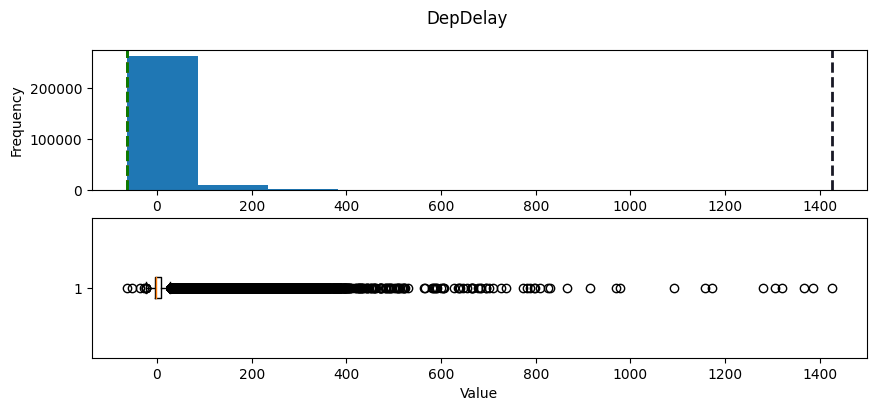

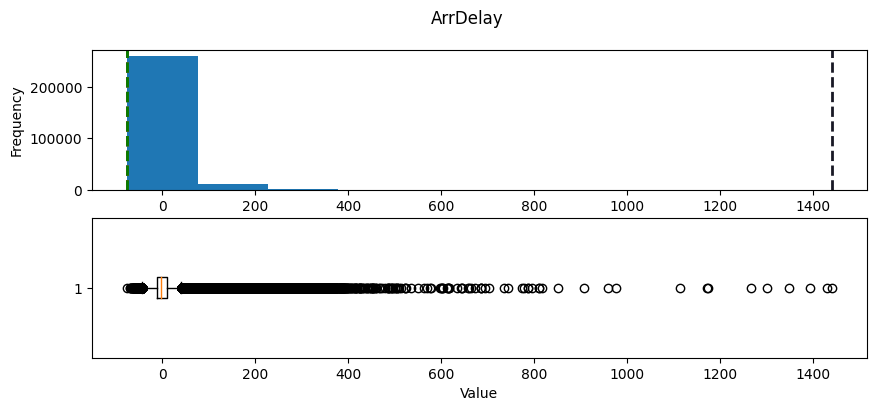

In [7]:
def show_distribution(var_data):
    from matplotlib import pyplot as plt
    
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mode_val = var_data.mode()[0]
    
    print(var_data.name, f'\nMinimum: {min_val:.2f} \nMean: {mean_val:.2f} \nMedian: {med_val:.2f} \nMode: {mode_val:.2f} \nMax: {max_val:.2f}')
    
    
    fig,ax = plt.subplots(2, 1, figsize=(10, 4))
    
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')
    
    ax[0].axvline(x=min_val, color="#181825", linestyle="dashed", linewidth=2)
    ax[0].axvline(x=min_val, color="cyan", linestyle="dashed", linewidth=2)    
    ax[0].axvline(x=min_val, color="red", linestyle="dashed", linewidth=2)    
    ax[0].axvline(x=min_val, color="green", linestyle="dashed", linewidth=2)    
    ax[0].axvline(x=max_val, color="#181825", linestyle="dashed", linewidth=2)  
    
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')
    
    
    fig.suptitle(var_data.name)
    
    
delayField = ['DepDelay', 'ArrDelay']

for col in delayField:
    show_distribution(df_flights[col])